<a href="https://colab.research.google.com/github/krucx/ML_from_scratch/blob/main/LogisticRegression_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [ ]:
# global variables
boundary = [0.5,-1,0.25]

In [ ]:
# Creating toy dataset with decision boundary 0.5x - y + 0.25
def createDataset(theta=[0.5,-1,0.25],n=100):
  X=[]
  Y=[]
  for i in range(n):
    X.append([np.random.rand(), np.random.rand()])
    if X[-1][0]*theta[0] + X[-1][1]*theta[1] + theta[2]>=0:
      Y.append(1)
    else:
      Y.append(0)
  return X,Y

In [ ]:
def visualize_dataset_with_basis(X,Y,theta,line_color='g'):
  color = ['r' if i==1 else 'b' for i in Y]
  xs=[]
  ys=[]
  for i,j in X:
    xs.append(i)
    ys.append(j)
  plt.scatter(x=xs,y=ys,c=color)
  plt.plot(xs,(-theta[0]*np.array(xs)-theta[2])/theta[1],c=line_color)

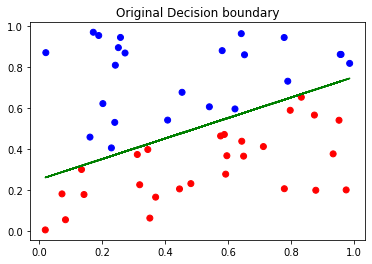

In [ ]:
X_t,Y_t = createDataset(boundary,50)
plt.title('Original Decision boundary')
visualize_dataset_with_basis(X_t,Y_t,boundary)

In [ ]:
X_t = np.array(X_t)
X = np.append(X_t,np.ones((X_t.shape[0],1)),axis=1)
Y = np.array(Y_t)

print(Y.shape)
print(X.shape)

(50,)
(50, 3)


In [ ]:
def sigmoid(Z):
  return 1/(1+np.exp(-1*Z))

In [ ]:
def binary_crossentropy(X,Y,theta):
  hyp = sigmoid(np.dot(X,theta.T))
  return (-1/X.shape[0])*(np.dot(Y,np.log(hyp)) + np.dot(1-Y,np.log(1-hyp)))

In [ ]:
def logisticReg_gd(X,Y,theta,epochs=1000,l_r=0.3):
  loss = []
  for i in range(epochs):
    theta_update = (1/X.shape[0])*np.dot(X.T,(sigmoid(np.dot(X,theta.T))-Y))
    theta = theta - l_r*theta_update
    loss.append(binary_crossentropy(X,Y,theta))
  return theta,loss

[ 3.48209513 -9.38322369  3.23500269]
0.1964969193523375


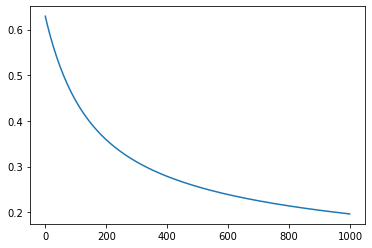

In [ ]:
epochs=1000
theta = np.random.randn(X.shape[1])
theta,loss = logisticReg_gd(X,Y,theta,epochs)
print(theta)
print(loss[-1])
plt.plot(range(epochs),loss)
plt.show()

In [ ]:
def testRandomlyOnDataset(X,Y,theta):
  index = np.random.randint(X.shape[0])
  prediction = sigmoid(np.dot(X[index],theta.T))
  print("Prediction {}   Expected {}".format(prediction,Y[index]))

In [ ]:
testRandomlyOnDataset(X,Y,theta)

Prediction 0.8652241579803911   Expected 1


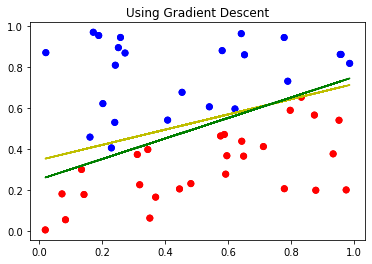

In [ ]:
# Result From Gradient Descent
plt.title('Using Gradient Descent')
visualize_dataset_with_basis(X_t,Y_t,theta,'y')
visualize_dataset_with_basis(X_t,Y_t,boundary,'g')

[ 0.69372685 -3.01270445  1.40140998]


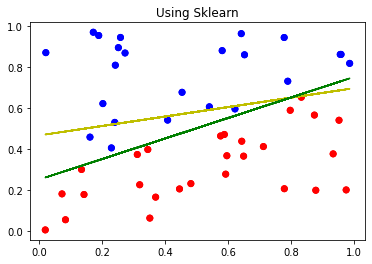

In [ ]:
reg = LogisticRegression(random_state=0).fit(X_t,Y)
print(np.append(reg.coef_,reg.intercept_))
plt.title('Using Sklearn')
visualize_dataset_with_basis(X_t,Y_t,np.append(reg.coef_,reg.intercept_),'y')
visualize_dataset_with_basis(X_t,Y_t,boundary,'g')